In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing


#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Read Data from CSV

In [2]:
data = pd.read_csv('military-expenditure.csv')

In [3]:
data.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2017,3.576700,NaN
1,Afghanistan,2016,3.680251,NaN
2,Afghanistan,2015,3.833142,NaN
3,Afghanistan,2014,5.109793,NaN
4,Afghanistan,2013,4.311764,NaN


In [4]:
# Read data from csv and print the head
data = data.drop(columns=['Value Footnotes'])
data.head(5)

,Country or Area,Year,Value
0,Afghanistan,2017,3.576700
1,Afghanistan,2016,3.680251
2,Afghanistan,2015,3.833142
3,Afghanistan,2014,5.109793
4,Afghanistan,2013,4.311764


### Lets normalize data

In [5]:
# Normalize the value column and drop old column

# Create x, where x the 'Value' column's values as floats
x = data[['Value']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized['normalized'] = pd.DataFrame(x_scaled)
df_normalized.drop(columns=0,inplace=True)

data_new = pd.concat([data,df_normalized ], axis=1)
data_new.drop(columns='Value',inplace=True)

In [6]:
# Check new dataframe with normalized value
data_new.head()

,Country or Area,Year,normalized
0,Afghanistan,2017,0.062227
1,Afghanistan,2016,0.064029
2,Afghanistan,2015,0.066689
3,Afghanistan,2014,0.088900
4,Afghanistan,2013,0.075016


#### Using tsfresh to extract features from data

In [7]:
# Use TSFresh library to extract features from data 
from tsfresh import extract_features
extracted_features = extract_features(data_new, column_id="Country or Area", column_sort="Year")

Feature Extraction: 100%|██████████| 10/10 [00:19<00:00,  1.70s/it]


In [8]:
#Check extracted features
extracted_features.head()

variable,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,normalized__time_reversal_asymmetry_statistic__lag_1,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.350384,0.301502,-0.588730,-0.571127,0.936081,0.280704,-1.000000,-0.191804,0.000000,NaN,...,-0.001712,-0.002800,-0.004547,0.0,0.0,0.0,0.0,0.0,0.004595,0.0
Albania,0.016369,0.044826,-0.502664,-0.418869,0.680401,0.047034,-1.000000,-0.022678,0.000000,NaN,...,-0.000009,-0.000022,-0.000030,0.0,0.0,0.0,0.0,0.0,0.000073,0.0
Algeria,1.007092,0.455701,-0.514044,-0.191397,1.832791,0.210115,0.785825,0.028354,0.022315,NaN,...,0.000988,0.001684,0.002074,0.0,0.0,0.0,0.0,0.0,0.002046,0.0
Angola,0.961375,1.413493,-0.025930,0.007579,0.040457,0.435317,-0.876504,-0.129176,0.070946,NaN,...,-0.000367,-0.001891,-0.001274,0.0,0.0,0.0,0.0,0.0,0.005286,0.0
Arab World,3.551196,0.715674,-0.363935,-0.578472,0.472974,0.530846,-0.907461,-0.084208,0.038986,NaN,...,-0.004318,-0.007801,-0.011248,0.0,0.0,0.0,0.0,0.0,0.005224,0.0


In [9]:
#Check shape of new data with extracted features
extracted_features.shape

(206, 794)

In [10]:
#Check if any columns contains Nan values (null values)
list_cols_with_nan = extracted_features.columns[extracted_features.isna().any()].tolist()
len(list_cols_with_nan)

568

In [11]:
# it seems 568 columns out of 794 have some null values

In [12]:
#lets replace nan value with 0.0
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
data_after_impute = impute(extracted_features)

 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"slope"'
 'normalized__agg_linear_trend__f_agg_"min"__chunk_len_50__attr_"stderr"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"'
 'normalized__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"rvalue"'
 'normalized__agg_linear_tre

In [13]:
#lets check if any column has any nan value
list_cols_with_nan_after_impute = data_after_impute.columns[data_after_impute.isna().any()].tolist()
len(list_cols_with_nan_after_impute)

0

In [14]:
#we dont have any nan values 
# lets reset the index
data_after_impute = data_after_impute.reset_index()

In [15]:
# #Creating new Csv
# data_after_impute.to_csv('new.csv')

In [16]:
# # read from new csv file 
# df = pd.read_csv('new.csv')
# df.head()

In [17]:
# we need to give labels to countries 
data_countries = pd.read_excel('Developing countries.xlsx')

developed_countries = data_countries [data_countries['Value'] == 0]
developing_countries = data_countries [data_countries['Value'] == 1] 

list_developed_countries = developed_countries['Countries']
list_developing_countries = developing_countries['Countries']

list_developed_countries = list(list_developed_countries)
list_developing_countries = list(list_developing_countries)

data_after_impute['label'] = -1

for i,da in data_after_impute.iterrows():
    if da['id'] in list_developed_countries:
        val = 0
        data_after_impute.at[i,'label'] = val
    elif da['id'] not in list_developed_countries:
        val = 1
        data_after_impute.at[i,'label'] = val

In [18]:
# check new df with added column as label 
data_after_impute.head()

variable,id,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation,label
0,Afghanistan,0.350384,0.301502,-0.588730,-0.571127,0.936081,0.280704,-1.000000,-0.191804,0.000000,...,-0.002800,-0.004547,0.0,0.0,0.0,0.0,0.0,0.004595,0.0,1
1,Albania,0.016369,0.044826,-0.502664,-0.418869,0.680401,0.047034,-1.000000,-0.022678,0.000000,...,-0.000022,-0.000030,0.0,0.0,0.0,0.0,0.0,0.000073,0.0,1
2,Algeria,1.007092,0.455701,-0.514044,-0.191397,1.832791,0.210115,0.785825,0.028354,0.022315,...,0.001684,0.002074,0.0,0.0,0.0,0.0,0.0,0.002046,0.0,1
3,Angola,0.961375,1.413493,-0.025930,0.007579,0.040457,0.435317,-0.876504,-0.129176,0.070946,...,-0.001891,-0.001274,0.0,0.0,0.0,0.0,0.0,0.005286,0.0,1
4,Arab World,3.551196,0.715674,-0.363935,-0.578472,0.472974,0.530846,-0.907461,-0.084208,0.038986,...,-0.007801,-0.011248,0.0,0.0,0.0,0.0,0.0,0.005224,0.0,1


In [19]:
#Split data into X(features),y 
y = data_after_impute['label']
X = data_after_impute.drop(columns=['id','label'])

In [20]:
y.value_counts()

1    171
0     35
Name: label, dtype: int64

In [21]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [22]:
y_train.value_counts()

1    104
0     19
Name: label, dtype: int64

#### Lets try different classifiers on the data

##### KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        16
          1       0.80      0.99      0.89        67

avg / total       0.65      0.80      0.72        83

Accuracy is:  0.7951807228915663


###### KNN with k ranging from 1 to 15

[0.7590361445783133, 0.6385542168674698, 0.7469879518072289, 0.6626506024096386, 0.8072289156626506, 0.8072289156626506, 0.8072289156626506, 0.7831325301204819, 0.8072289156626506, 0.7951807228915663, 0.7951807228915663, 0.7951807228915663, 0.8072289156626506, 0.8072289156626506, 0.8072289156626506]


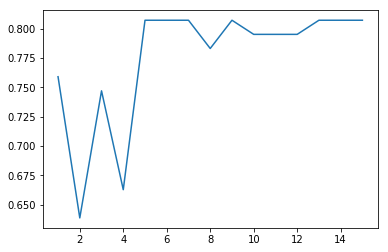

In [24]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores)  

#### Random Forest Classifier

In [25]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.7896053658232809
Accuracy Score:  0.8192771084337349


#### Fine tuninng Random Forest for different number of estimators

[0.7573196897177753, 0.7896053658232809, 0.8176579837135102, 0.8176579837135102, 0.8522054174143383, 0.8681980669932478, 0.8834763514489614, 0.8522054174143383, 0.8522054174143383, 0.8522054174143383, 0.8522054174143383, 0.8522054174143383]


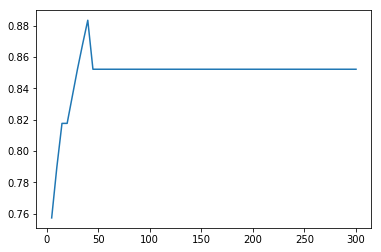

In [26]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

#### Lets fine tune for number of features with best number of estimator from above analysis

In [27]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8522054174143383
Accuracy Score:  0.8674698795180723


[0.8681980669932478, 0.8628316081226314, 0.8726583352041707, 0.8353979297471578, 0.8353979297471578, 0.8681980669932478, 0.8522054174143383, 0.8418376803918972, 0.8575822073265081, 0.825333675126036, 0.825333675126036]


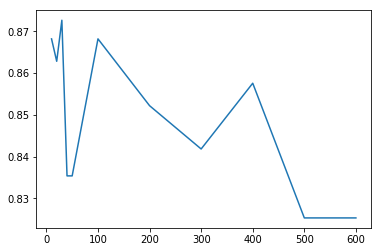

In [28]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=30,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

#### Logistic regression model

In [29]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8114382664347228
Accuracy Score:  0.8072289156626506


#### Extra tree classifier

In [30]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=5,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8726583352041707
Accuracy Score:  0.8795180722891566


[0.8726583352041707, 0.8763879045594143, 0.8457106016037392, 0.8522054174143383, 0.8681980669932478, 0.8681980669932478, 0.8681980669932478, 0.8681980669932478, 0.8681980669932478, 0.8834763514489614, 0.8681980669932478, 0.8522054174143383]


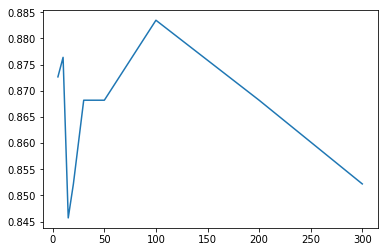

In [31]:
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [32]:
model = ExtraTreesClassifier(n_estimators=20,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8522054174143383
Accuracy Score:  0.8674698795180723


#### fine tune for max_features

[0.8522054174143383, 0.8353979297471578, 0.8871448542723626, 0.8981266681633365, 0.8471900022450048, 0.8471900022450048, 0.8871448542723626, 0.8471900022450048, 0.8575822073265081, 0.851665485471297, 0.8057939190816023]


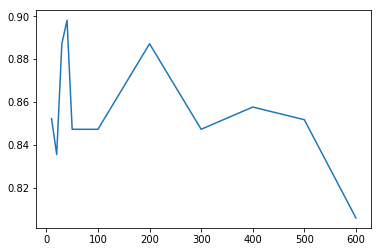

In [33]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=20,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
print(f1_scores)

#### Recursive Feature Elimination 

In [34]:
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 733
Best features : Index(['normalized__approximate_entropy__m_2__r_0.3',
       'normalized__approximate_entropy__m_2__r_0.5',
       'normalized__approximate_entropy__m_2__r_0.7',
       'normalized__approximate_entropy__m_2__r_0.9',
       'normalized__ar_coefficient__k_10__coeff_0',
       'normalized__ar_coefficient__k_10__coeff_1',
       'normalized__ar_coefficient__k_10__coeff_2',
       'normalized__ar_coefficient__k_10__coeff_3',
       'normalized__ar_coefficient__k_10__coeff_4',
       'normalized__augmented_dickey_fuller__attr_"pvalue"',
       ...
       'normalized__time_reversal_asymmetry_statistic__lag_1',
       'normalized__time_reversal_asymmetry_statistic__lag_2',
       'normalized__time_reversal_asymmetry_statistic__lag_3',
       'normalized__value_count__value_-inf',
       'normalized__value_count__value_0', 'normalized__value_count__value_1',
       'normalized__value_count__value_inf',
       'normalized__value_count__value_nan',

In [35]:
cols = X_train.columns[rfecv.support_]

In [36]:
X = X[cols]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [38]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        16
          1       0.80      0.99      0.89        67

avg / total       0.65      0.80      0.72        83

Accuracy is:  0.7951807228915663


[0.7590361445783133, 0.6385542168674698, 0.7469879518072289, 0.6626506024096386, 0.8072289156626506, 0.8072289156626506, 0.8072289156626506, 0.7831325301204819, 0.8072289156626506, 0.7951807228915663, 0.7951807228915663, 0.7951807228915663, 0.8072289156626506, 0.8072289156626506, 0.8072289156626506]


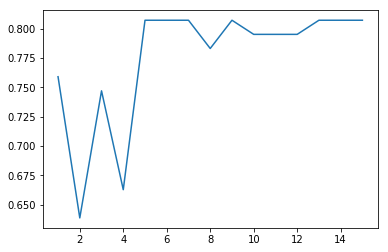

In [39]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,pred))
    
plt.plot(kVals,scores)    
print(scores) 

[0.8681980669932478, 0.8353979297471578, 0.8575822073265081, 0.8681980669932478, 0.8834763514489614, 0.8834763514489614, 0.8981266681633365, 0.8981266681633365, 0.8981266681633365, 0.8834763514489614, 0.8353979297471578, 0.8353979297471578]


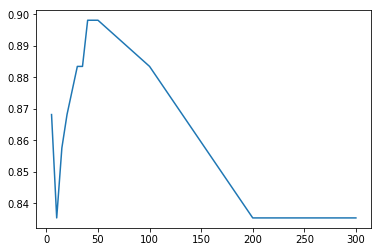

In [40]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [41]:
rf_classifier = RandomForestClassifier(n_estimators=30, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
dsf = classification_report(y_test,pred)
acc = accuracy_score(y_test,pred) 
print(dsf)
print('Accuracy is: ',acc)

             precision    recall  f1-score   support

          0       0.82      0.56      0.67        16
          1       0.90      0.97      0.94        67

avg / total       0.89      0.89      0.88        83

Accuracy is:  0.891566265060241
